<a href="https://colab.research.google.com/github/PrakarshAgrawal/Markowitz-Portfolio-Optimisation/blob/main/markowitz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nsepy

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
from nsepy import get_history 

In [ ]:
from datetime import date

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ind_nifty50list.csv')

In [ ]:
symbols = data.Symbol.tolist()

In [ ]:
data = get_history(symbols[0],start=date(2015,1,15), end=date(2022,1,15)) 
cols = data.columns.tolist()
data[symbols[0]] = data['Close']
data.drop(cols,inplace=True,axis=1)

In [ ]:
symbols.pop(0)

'ADANIPORTS'

In [ ]:
data

In [ ]:
for i in symbols:
  df = get_history(i,start=date(2015,1,15), end=date(2022,1,15)) 
  data[i] = df['Close']

In [ ]:
data.index =  pd.to_datetime(data.index)

In [ ]:
returns = data.pct_change()

In [ ]:
cov_matrix = returns.cov()
meanReturns = data.resample('Y').last().pct_change().mean()

In [ ]:
len(meanReturns)

50

In [ ]:
cov_matrix

In [ ]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights )
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) *np.sqrt(252)
    return std, returns

def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(50)
        weights = weights/np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = ((portfolio_return - risk_free_rate) / portfolio_std_dev)
    return results, weights_record
        

def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    optimised_weights = weights[max_sharpe_idx]
    return sdp,rp,optimised_weights,results

In [ ]:
sdp,rp,optimised_weights,results = display_simulated_ef_with_random(meanReturns, cov_matrix, 10000, 0.032)

In [ ]:
meanReturns

ADANIPORTS    0.191339
APOLLOHOSP    0.251330
ASIANPAINT    0.222977
AXISBANK      0.078708
BAJAJ-AUTO    0.053454
BAJFINANCE    0.289041
BAJAJFINSV    0.407399
BPCL         -0.085280
BHARTIARTL    0.170428
BRITANNIA     0.065274
CIPLA         0.080226
COALINDIA    -0.081890
DIVISLAB      0.280124
DRREDDY       0.094980
EICHERMOT    -0.050712
GRASIM        0.047273
HCLTECH       0.112742
HDFCBANK      0.086169
HDFCLIFE      0.138903
HEROMOTOCO    0.012694
HINDALCO      0.361546
HINDUNILVR    0.176092
HDFC          0.121483
ICICIBANK     0.190591
ITC          -0.045164
INDUSINDBK    0.023828
INFY          0.132874
JSWSTEEL      0.132642
KOTAKBANK     0.164487
LT            0.082678
M&M          -0.019055
MARUTI        0.118829
NTPC          0.002336
NESTLEIND     0.197433
ONGC         -0.025346
POWERGRID     0.061717
RELIANCE      0.151669
SBILIFE       0.157548
SHREECEM      0.135649
SBIN          0.148370
SUNPHARMA     0.035285
TCS           0.092428
TATACONSUM    0.386805
TATAMOTORS 

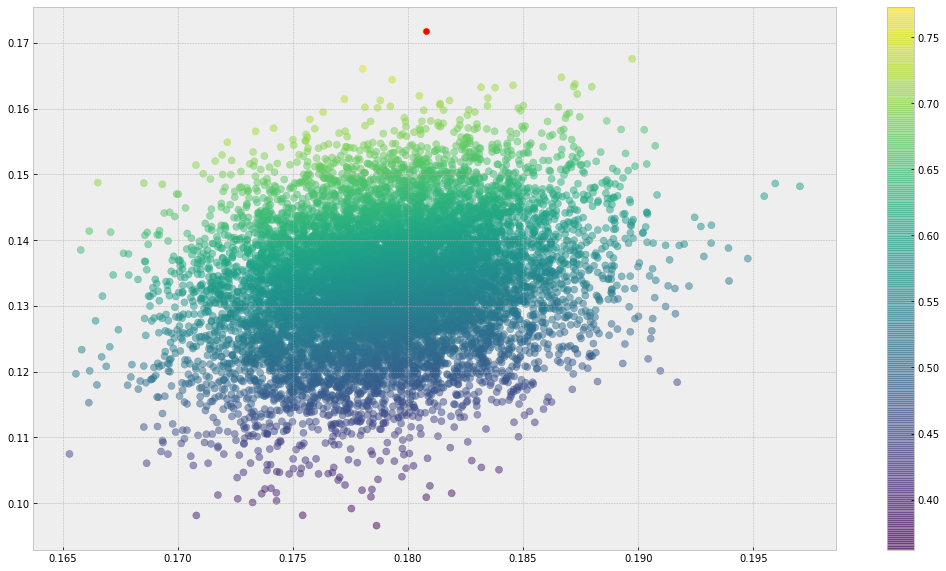

In [ ]:
plt.figure(figsize=(18,10))
plt.scatter(results[0],results[1],c = results[2],s=50,alpha = 0.5)
plt.colorbar()
plt.scatter(sdp,rp,c='red')
plt.show()

In [ ]:
weights = np.random.random(50)


In [ ]:
sdp,rp

(0.16489830125920302, 0.15523303151374054)